In [45]:
from langgraph.graph import StateGraph, START ,END
from langgraph.checkpoint.memory import MemorySaver

In [46]:
from typing import TypedDict

class State(TypedDict):
    input: str
    user_feedback: str

def step_1(state: State) :
    print("<---- Step 1: User Input ---->")
    
def human_feedback(state: State) -> str:
    print("<---- Step 2: User Feedback ---->")
    

def step_3(state: State) -> str:
    print("<---- Step 3: Process User Feedback ---->")
    

In [47]:
flow = StateGraph(State)

flow.add_node("step_1", step_1)
flow.add_node("human_feedback", human_feedback)
flow.add_node("step_3", step_3)

flow.add_edge(START, "step_1")
flow.add_edge("step_1", "human_feedback")
flow.add_edge("human_feedback", "step_3")
flow.add_edge("step_3", END)

memory =MemorySaver()

app = flow.compile(checkpointer=memory, interrupt_before=["human_feedback"])

In [48]:
app.get_graph().draw_mermaid_png(output_file_path="with_human_feedback.png")

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xa9\x00\x00\x01\xda\x08\x02\x00\x00\x00\xf4v\xfe\xa3\x00\x00\x10\x00IDATx\x9c\xec\x9d\x07TT\xc7\x1a\x80g;[\xe8\xbdw\xb1!\x16@c\x14\x1b\xea\xb3\x02\x8a]4\xf6^\x92\xd8M1\x1a51F\x8d-j4\xb1\xc5\x98D|\xb6\xc4\x16\x95\xd8[\x14\x14Q\x9a\x88J\xef,\xcb\xf6\xe5\xfdp\x93\rQ \xe4\x85\xe5^v\xe6;\x1c\xce\xec\xad{\xf7\x9b\xf9g\xe6\x96\xb9\xdc\x8a\x8a\nD\xc0\x12."\xe0\nq\x8f/\xc4=\xbe\x10\xf7\xf8B\xdc\xe3\x0bq\x8f/\x8cv\xafQ\xeb\xf2^*e\xa5\xdar\xa9F\xa7\xa9P)\x9b@wT dsx,\xb1)Wd\xca\xb1w7A\x0c\x86\xc5\xc0\xfe\xbdR\xa1M\xbc+M\x8b\x97e\xa6*l]\x04b3\x8e\xc8\x94kn\xcbS\xc9u\x88\xf1\xf0\x85\xec\xa2l\x95L\xaa\xe1pY\xe9\x8f\xcb=[\x89\xbd\xda\x88}\xdb\x9a"\xe6\xc18\xf77\x7f.x\x96 s\xf4\x10z\xb6\x16\xbb5\x17\xa1\xa6\x8cZ\xa9K{$KO\x90=O\x94w\x1ed\xdd"\xd8\x0c1\t\x06\xb9O\x8e\x95\x9e?\x98\x13\xd4\xc7\n\xfe\x90q\x01u\xd6\xf5\x93\x05\x85\xb9\xaa\xbec\x1d\xccmx\x88\x190\xc5\xfd\x8dS\x05\x8arm\xc8\x10[\x08\x95\xc8H)\xceS\x9d\xd8\x99\xf9\xe6`\x1b\xef6\x12\xc4\x00\x18\x

In [49]:
thread = {"configurable":{"thread_id":1}}
intial_inpit = {"input":"Hello world!"}
for event in app.stream(intial_inpit, thread, stream_mode="values"):
    print(event)

{'input': 'Hello world!'}
<---- Step 1: User Input ---->


In [50]:
print(app.get_state(thread).next)
user_input = input("Please provide your feedback: ")
app.update_state(thread, {"user_feedback": user_input}, as_node="human_feedback")

('human_feedback',)


{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f03a213-0caa-6904-8002-5bae4a386a05'}}

In [51]:
print("Updated state after user feedback:", app.get_state(thread))
for event in app.stream(None, thread, stream_mode="values"):
    print(event)



Updated state after user feedback: StateSnapshot(values={'input': 'Hello world!', 'user_feedback': 'hiwe'}, next=('step_3',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f03a213-0caa-6904-8002-5bae4a386a05'}}, metadata={'source': 'update', 'writes': {'human_feedback': {'user_feedback': 'hiwe'}}, 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-05-26T11:04:27.540483+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f03a212-c973-614a-8001-3169198101ee'}}, tasks=(PregelTask(id='131b7d75-0779-2a9a-283e-97df19c7fa7c', name='step_3', path=('__pregel_pull', 'step_3'), error=None, interrupts=(), state=None, result=None),), interrupts=())
{'input': 'Hello world!', 'user_feedback': 'hiwe'}
<---- Step 3: Process User Feedback ---->


In [52]:
thread = {"configurable":{"thread_id":1}}
intial_inpit = {"input":"Hello world!"}
for event in app.stream(intial_inpit, thread, stream_mode="values"):
    print(event)

user_input = input("Please provide your feedback: ")
for event in app.stream(None, thread, stream_mode="values"):
    print(event)


{'input': 'Hello world!', 'user_feedback': 'hiwe'}
<---- Step 1: User Input ---->
{'input': 'Hello world!', 'user_feedback': 'hiwe'}
<---- Step 2: User Feedback ---->
<---- Step 3: Process User Feedback ---->


## with SQLITE saver

In [66]:
import sqlite3

conn = sqlite3.connect('checkpoint.sqlite')
conn.execute('PRAGMA journal_mode=DELETE;')
# Now perform your queries
conn.close()

In [ ]:
from langgraph.checkpoint.sqlite import SqliteSaver
import sqlite3

# First Run this to create the database
# connection = sqlite3.connect("checkpoint.sqlite", check_same_thread=False)
# sql_memory = SQLiteSaver(connection=connection)

# THen use this to load the database
sql_memory = SqliteSaver.from_conn_string("checkpoint.sqlite")



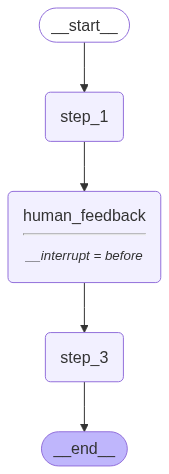

In [68]:
app2 = flow.compile(checkpointer=sql_memory, interrupt_before=["human_feedback"])
app2


In [71]:
thread = {"configurable":{"thread_id":1}}
intial_inpit = {"input":"Hello world!"}
for event in app.stream(intial_inpit, thread, stream_mode="values"):
    print(event)

{'input': 'Hello world!', 'user_feedback': 'hiwe'}
<---- Step 1: User Input ---->


In [73]:
thread = {"configurable":{"thread_id":1}}
user_input = input("Please provide your feedback: ")
for event in app.stream(None, thread, stream_mode="values"):
    print(event)

{'input': 'Hello world!', 'user_feedback': 'hiwe'}
<---- Step 2: User Feedback ---->
<---- Step 3: Process User Feedback ---->
